In [1]:
import pandas as pd
import numpy as np
import pickle 
import time
import matplotlib.pyplot as plt

In [2]:
file_name = "noise_complaints.pickle"
complaints = pickle.load(open(file_name, "rb"))
# keys = ['Total', 'People', 'Traffic', 'region_areas', 'region_densities', 'region_names']

In [3]:
densities = complaints['region_densities'][:]
areas = complaints['region_areas'][:]
names = complaints['region_names'][:]

total_complaints = complaints['Total']['Region'][:]
people_complaints = complaints['People']['Region'][:]
traffic_complaints = complaints['Traffic']['Region'][:]

total_complaint_per_region = np.zeros(59)
people_complaint_per_region = np.zeros(59)
traffic_complaint_per_region = np.zeros(59)
#num complaints will already be correlated with area due to size of regions
#will i need to do complaint densities ?

for r in range(len(names)):
    tot_inds = np.where(total_complaints == names[r])[0]
    total_complaint_per_region[r] = len(tot_inds)#/areas[r]
    
    people_inds = np.where(people_complaints == names[r])[0]
    people_complaint_per_region[r] = len(people_inds)#/areas[r]
    
    traffic_inds = np.where(traffic_complaints == names[r])[0]
    traffic_complaint_per_region[r] = len(traffic_inds)#/areas[r]

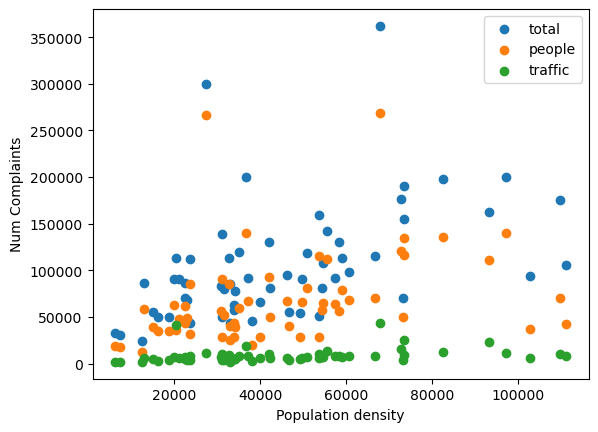

In [4]:
asc_densities = np.argsort(densities)

plt.scatter(densities[asc_densities], total_complaint_per_region[asc_densities], label='total')
plt.scatter(densities[asc_densities], people_complaint_per_region[asc_densities], label='people')
plt.scatter(densities[asc_densities], traffic_complaint_per_region[asc_densities], label='traffic')

plt.legend()
plt.xlabel('Population density')
plt.ylabel('Num Complaints') #NOT NORMALIZED AGAINST AREA (not density)
plt.show()

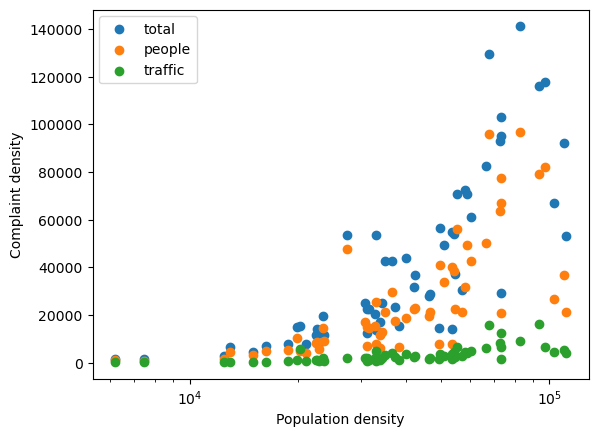

In [5]:
total_complaint_densities = total_complaint_per_region/areas
people_complaint_densities = people_complaint_per_region/areas
traffic_complaint_densities = traffic_complaint_per_region/areas

plt.scatter(densities[asc_densities], total_complaint_densities[asc_densities], label='total')
plt.scatter(densities[asc_densities], people_complaint_densities[asc_densities], label='people')
plt.scatter(densities[asc_densities], traffic_complaint_densities[asc_densities], label='traffic')
plt.legend()
plt.xscale('log')
plt.xlabel('Population density')
plt.ylabel('Complaint density') #complaints / mile^2
plt.show()

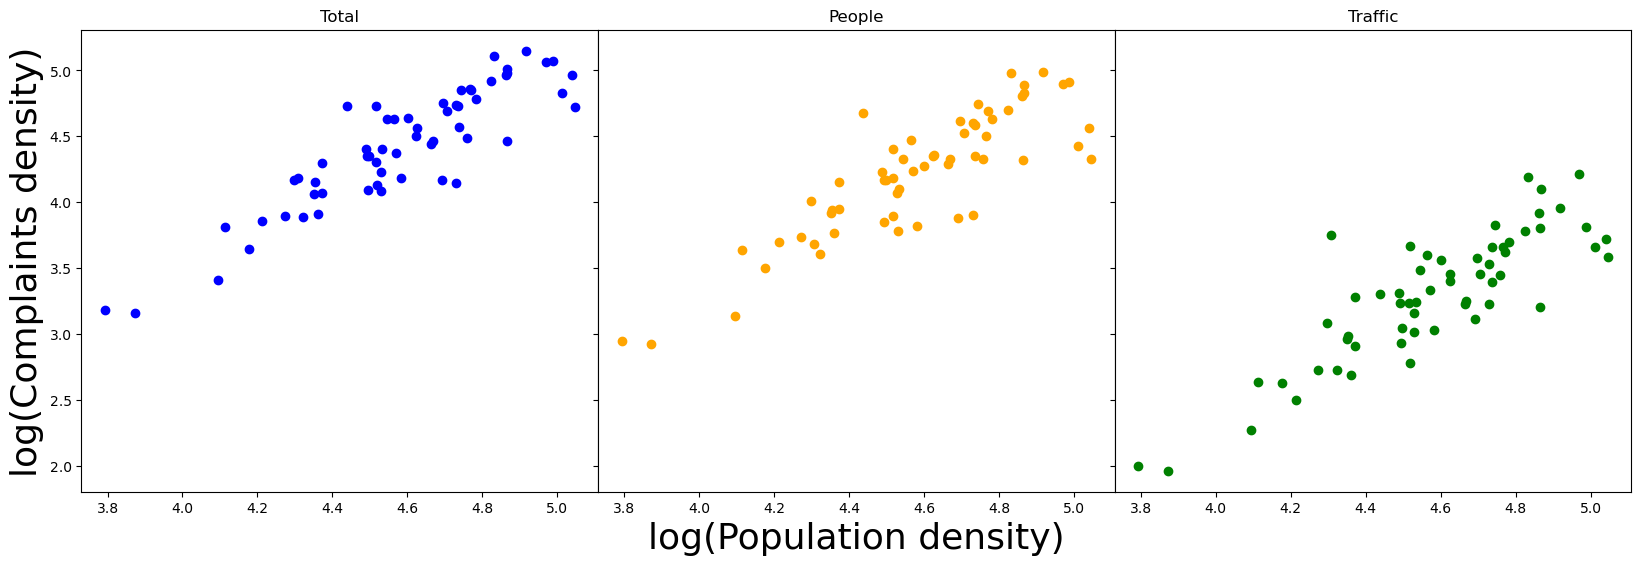

In [9]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(20, 6), facecolor='white')
plt.subplots_adjust(wspace=0)

axs[0].scatter(np.log10(densities[asc_densities]), np.log10(total_complaint_densities[asc_densities]), color='blue')
axs[0].set_ylabel('log(Complaints density)', fontsize="26")
axs[0].set_title("Total")

axs[1].scatter(np.log10(densities[asc_densities]), np.log10(people_complaint_densities[asc_densities]), color='orange')
axs[1].set_title("People")
axs[1].set_xlabel('log(Population density)', fontsize="26")

axs[2].scatter(np.log10(densities[asc_densities]), np.log10(traffic_complaint_densities[asc_densities]), color='green')
axs[2].set_title("Traffic")


#title = "Gas Halo Fractions against Overdensities for CV set at Different Halo Mass Ranges"
#fig.suptitle(title)

#plt.savefig('population_complaints.pdf', format='pdf', bbox_inches = 'tight')
plt.show()
